In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

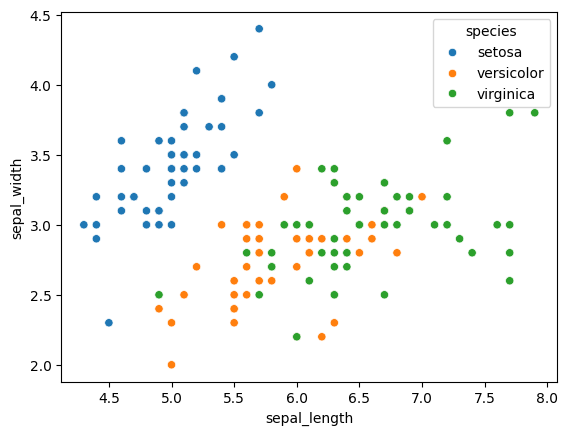

In [4]:
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species)

<Axes: xlabel='petal_length', ylabel='petal_width'>

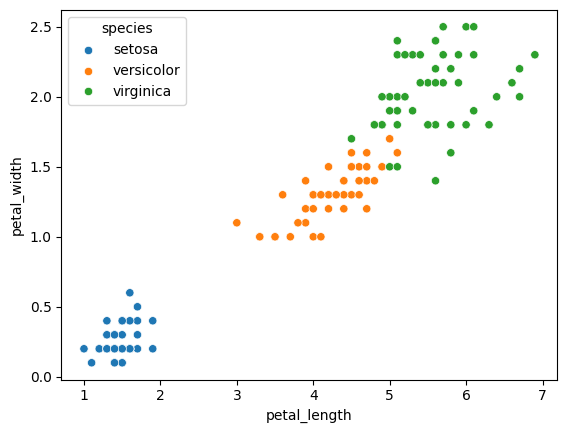

In [5]:
sns.scatterplot(x=iris.petal_length,y=iris.petal_width,hue=iris.species)

In [22]:
num_cols = ['sepal_length','sepal_width','petal_length','petal_width']

In [23]:
inputs = iris[num_cols]
inputs.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### K Means Clustering

In [55]:
from sklearn.cluster import KMeans

In [56]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm imple

In [57]:
model = KMeans(n_clusters=3,random_state=2)

In [58]:
model.fit(inputs)

KMeans(n_clusters=3, random_state=2)

In [59]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [60]:
pred = model.predict(inputs)

In [61]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [66]:
model.predict([[5,3,4,1.5],[5,3,1.3,0.1]]) #predicting new inputs

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int32)

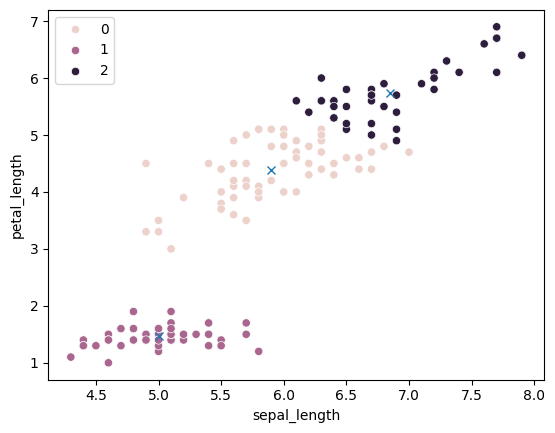

In [35]:
sns.scatterplot(x=inputs.sepal_length,y=iris.petal_length,hue=pred)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y,'x')

In [36]:
model.inertia_

78.851441426146

In [37]:
model = KMeans(n_clusters=6,random_state=2).fit(inputs)

In [38]:
pred = model.predict(inputs)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 4, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       4, 3, 0, 3, 4, 3, 4, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 4, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 5, 4, 2, 5, 5, 2, 3, 2, 5, 2,
       5, 5, 5, 4, 4, 5, 5, 2, 2, 4, 5, 4, 2, 4, 5, 2, 4, 4, 5, 2, 2, 2,
       5, 4, 4, 2, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4], dtype=int32)

In [39]:
model.cluster_centers_

array([[6.4047619 , 2.94285714, 4.57142857, 1.43809524],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.5125    , 2.58333333, 3.88333333, 1.19166667],
       [5.94      , 2.765     , 4.935     , 1.735     ],
       [6.56086957, 3.06956522, 5.52608696, 2.15217391]])

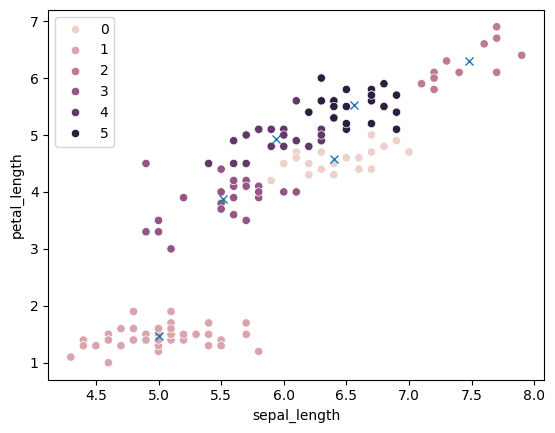

In [40]:
sns.scatterplot(x=inputs.sepal_length,y=iris.petal_length,hue=pred)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y,'x')

In [42]:
model.inertia_

41.84030072463769

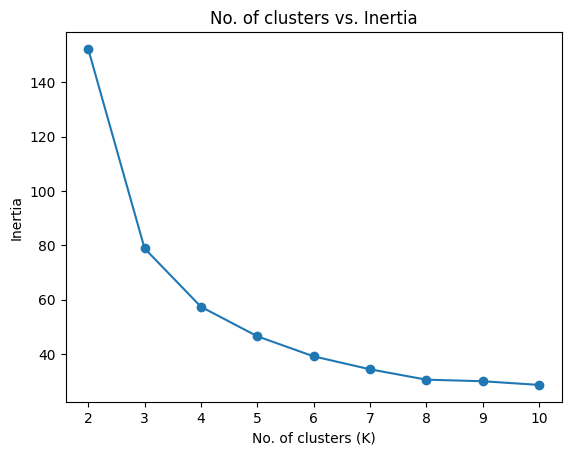

In [48]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters,random_state=42).fit(inputs)
    inertias.append(model.inertia_)

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

### DBSCAN

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
?DBSCAN

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

This implementation has a worst case memory complexity of :math:`O({n}^2)`,
which can occur when the `eps` param is large and `min_samples` is low,
while the original DBSCAN only uses linear memory.
For further details, see the Notes below.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
 

In [85]:
model = DBSCAN(eps=0.8,min_samples=4).fit(inputs)

In [86]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

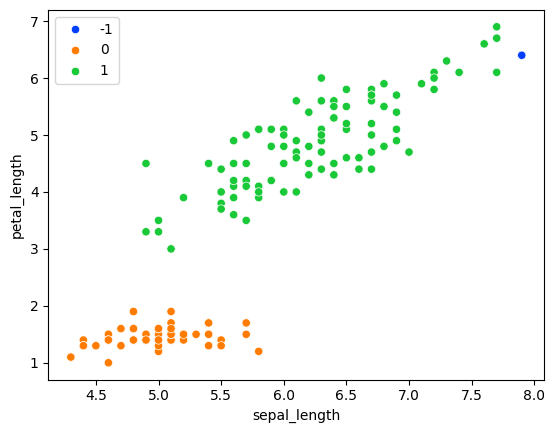

In [87]:
sns.scatterplot(data=inputs, x='sepal_length', y='petal_length', hue=model.labels_,palette='bright');

### Principal Component Analysis (PCA)

In [88]:
from sklearn.decomposition import PCA

In [89]:
?PCA

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

With sparse inputs, the ARPACK implementation of the truncated SVD can be
used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
may consider :class:`TruncatedSVD` where the data are not centered.

Notice that this class only supports sparse inputs for some solvers such as
"arpack" and "c

In [90]:
pca = PCA(n_components=2)

In [91]:
pca.fit(inputs)

PCA(n_components=2)

In [93]:
transformed = pca.transform(inputs)

In [96]:
transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

<Axes: >

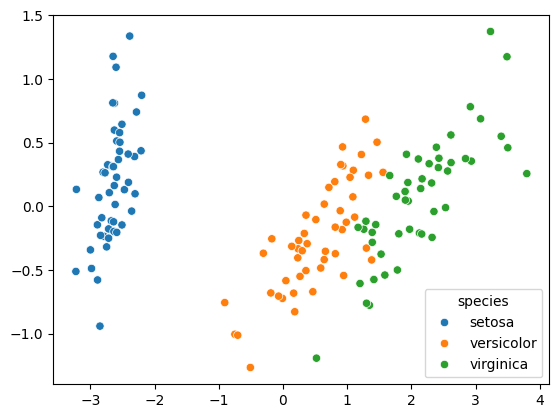

In [97]:
sns.scatterplot(x=transformed[:,0],y=transformed[:,1],hue=iris['species'])

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [98]:
from sklearn.manifold import TSNE

In [99]:
?TSNE

Init signature:
TSNE(
    n_components=2,
    *,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate='auto',
    max_iter=None,
    n_iter_without_progress=300,
    min_grad_norm=1e-07,
    metric='euclidean',
    metric_params=None,
    init='pca',
    verbose=0,
    random_state=None,
    method='barnes_hut',
    angle=0.5,
    n_jobs=None,
    n_iter='deprecated',
)
Docstring:     
T-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimension

In [100]:
tsne = TSNE(n_components=2)

In [101]:
transformed = tsne.fit_transform(inputs)

In [102]:
transformed

array([[-2.42846699e+01, -1.96068853e-01],
       [-2.17319050e+01,  6.53882325e-01],
       [-2.17767735e+01, -4.33847994e-01],
       [-2.14130859e+01, -1.41203120e-01],
       [-2.42849083e+01, -6.06253624e-01],
       [-2.62441120e+01, -5.33888757e-01],
       [-2.20059872e+01, -7.92660773e-01],
       [-2.36063728e+01,  8.98885578e-02],
       [-2.08891449e+01, -8.28106523e-01],
       [-2.22197151e+01,  4.80458289e-01],
       [-2.58226967e+01,  8.83378163e-02],
       [-2.29560204e+01,  3.29243898e-01],
       [-2.14609852e+01,  4.00310963e-01],
       [-2.04171238e+01, -7.15105116e-01],
       [-2.71277199e+01,  4.87351343e-02],
       [-2.72579269e+01, -4.86495912e-01],
       [-2.64031487e+01, -2.06707284e-01],
       [-2.43507843e+01, -6.94209263e-02],
       [-2.66233368e+01,  3.07076067e-01],
       [-2.53120079e+01, -6.81390285e-01],
       [-2.52586861e+01,  9.00316954e-01],
       [-2.50500813e+01, -4.59083408e-01],
       [-2.02292347e+01,  2.96012908e-01],
       [-2.

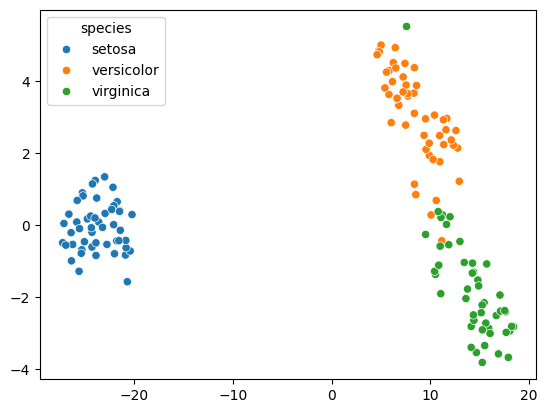

In [104]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris['species']);